# Dependency installed

In [3]:
!pip install pdf2image

In [10]:
pip install colpali-engine


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 110.7 MB/s eta 0:00:00
  Created wheel for gputil: filename=GPUtil-1.4.0-py3-none-any.whl size=7392 sha256=6ed8c33ccaba507f0775e77806f656af653e76dc4564d4dfb70d56611601c1b3
  Stored in directory: /root/.cache/pip/wheels/a9/8a/bd/81082387151853ab8b6b3ef33426e98f5cbfebc3c397a9d4d0
Successfully built gputil
  Attempting uninstall: pillow
    Found existing installation: pillow 11.0.0
    Uninstalling pillow-11.0.0:
      Successfully uninstalled pillow-11.0.0
  Attempting uninstall: peft
    Found existing installation: peft 0.13.2
    Uninstalling peft-0.13.2:
      Successfully uninstalled peft-0.13.2


# Colpali to read the image and ask about the queries

In [8]:
from pdf2image import convert_from_path
import os


pdf_path = "/content/sample_data/Linecard Space DACH.pdf" ### ---------------> change here <------------------


output_folder = "pdf_images"
os.makedirs(output_folder, exist_ok=True)


images = convert_from_path(pdf_path, dpi=300)


image_files = []
for i, image in enumerate(images):
    image_path = os.path.join(output_folder, f"page_{i + 1}.png")
    image.save(image_path, "PNG")
    image_files.append(image_path)

print(f"PDF converted to images and saved in {output_folder}")

# Colpali Analysis Placeholder
# This is where you'd integrate Colpali for your specific analysis.
# For example:
# - Optical Character Recognition (OCR)
# - Image segmentation or object detection
print("Images ready for Colpali analysis!")


PDF converted to images and saved in pdf_images
Images ready for Colpali analysis!


In [7]:
!sudo apt update
!sudo apt install poppler-utils


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:6 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [3,364 kB]
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,549 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 P

## Only Image based

In [1]:
import torch
from PIL import Image
from colpali_engine.models import ColPali, ColPaliProcessor

model_name = "vidore/colpali-v1.2"
model = ColPali.from_pretrained(
    model_name,
    torch_dtype=torch.bfloat16,
    device_map="cuda:0"  # Use "mps" if on Apple Silicon
).eval()

processor = ColPaliProcessor.from_pretrained(model_name)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


adapter_config.json:   0%|          | 0.00/750 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/66.3k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/862M [00:00<?, ?B/s]

`config.hidden_act` is ignored, you should use `config.hidden_activation` instead.
Gemma's activation function will be set to `gelu_pytorch_tanh`. Please, use
`config.hidden_activation` if you want to override this behaviour.
See https://github.com/huggingface/transformers/pull/29402 for more details.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

adapter_model.safetensors:   0%|          | 0.00/78.6M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/700 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/243k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.8M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/733 [00:00<?, ?B/s]

In [ ]:
!nvidia-smi

Fri Nov 22 12:01:48 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   37C    P0              26W /  72W |   5981MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--



*   First input all the images
*   write down the queries
*   process the images and the queries



In [2]:
images = [
    Image.open("/content/pdf_images/page_1.png"),
    Image.open("/content/pdf_images/page_2.png"),
    Image.open("/content/pdf_images/page_3.png"),
    Image.open("/content/pdf_images/page_4.png"),
    Image.open("/content/pdf_images/page_5.png"),
    Image.open("/content/pdf_images/page_6.png"),
    Image.open("/content/pdf_images/page_7.png"),
    Image.open("/content/pdf_images/page_8.png"),
    Image.open("/content/pdf_images/page_9.png"),
    Image.open("/content/pdf_images/page_10.png"),
    Image.open("/content/pdf_images/page_11.png"),
    Image.open("/content/pdf_images/page_12.png"),
    Image.open("/content/pdf_images/page_13.png"),



    # Add more images as needed
]


queries = [
    "What are the components Airborn is selling?",
    "What are the components AEM is selling?",
    # Add more queries as needed
]

batch_images = processor.process_images(images).to(model.device)
batch_queries = processor.process_queries(queries).to(model.device)

In [3]:
with torch.no_grad():
    image_embeddings = model(**batch_images)
    query_embeddings = model(**batch_queries)


In [4]:
image_embeddings.shape

torch.Size([10, 1030, 128])

In [5]:
query_embeddings.shape

torch.Size([2, 23, 128])

In [6]:
scores = processor.score_multi_vector(query_embeddings, image_embeddings)


In [7]:
scores

tensor([[ 8.8750, 14.7500, 13.9375, 15.1875,  9.8125, 11.0625, 11.1875,  9.4375,
          9.5625,  7.7500],
        [ 9.7500, 13.6250, 12.5000, 13.8125, 10.8125,  9.6875, 10.9375, 10.7500,
         10.5625, 10.2500]])

visualize the results

Most relevant page: 4


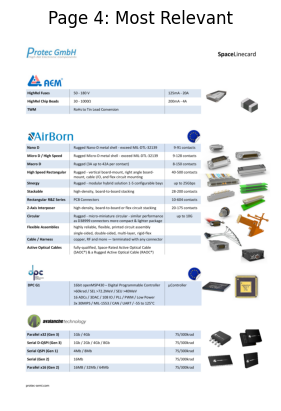

In [8]:
import matplotlib.pyplot as plt

# Display top result
top_page_index = scores[0].argmax().item()
print(f"Most relevant page: {top_page_index + 1}")

# Show the corresponding image
plt.imshow(images[top_page_index])
plt.title(f"Page {top_page_index + 1}: Most Relevant")
plt.axis("off")
plt.show()


# End of Experiment ------>

# Working with PDF


1.   PDF that contains images or graphs
2.   Split the PDF and work with these
3.   Mainly colpali is good for these



Here's how a user might interact with the model:

    Upload PDF: User uploads a PDF document.
    Select Task: User specifies a task (e.g., summarization, Q&A, table extraction).
    Process PDF: Co-PALi processes the document and provides the requested output.
    Feedback Loop: The user can refine queries or specify additional tasks, creating an interactive analysis workflow.

In [ ]:
!pip install PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 13.4 MB/s eta 0:00:00


In [1]:
from PyPDF2 import PdfReader
from transformers import pipeline

# Extract text from PDF
reader = PdfReader("/content/sample_data/Linecard_Avionic_Industrial_DACH-2.pdf")
text = ""
for page in reader.pages:
    text += page.extract_text()




ModuleNotFoundError: No module named 'PyPDF2'

In [ ]:
len(text)

11285

In [ ]:
# Initialize summarization pipeline
summarizer = pipeline("summarization")
summary = summarizer(text, max_length=130, min_length=30, do_sample=False, truncation=True)

# Output summarized content
print(summary)



No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'summary_text': ' Avionic Linecard Protec GmbH is a specialized distributor of high quality products for the aerospace, military and niche industrial markets . The linecard is designed for the Space, Avionic, High Voltage, High Temperature and niche Industrial markets . We are particularly specialised  in highly qualiﬁed components  for industrial, military, and space applications .'}]


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


sales of High Reliability 
components


# Question about the PDF

In [ ]:

# Initialize question-answering pipeline
qa_pipeline = pipeline("question-answering")
question = "What does the PDF says about the CalRAMIC?"
answer = qa_pipeline(question=question, context=text)

print(answer['answer'])

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Responsibilities


In [ ]:
print(answer)

{'score': 0.003169463947415352, 'start': 1555, 'end': 1571, 'answer': 'Responsibilities'}


In [ ]:
print(summary)

[{'summary_text': ' Avionic Linecard Protec GmbH is a specialized distributor of high quality products for the aerospace, military and niche industrial markets . The linecard is designed for the Space, Avionic, High Voltage, High Temperature and niche Industrial markets . We are particularly specialised  in highly qualiﬁed components  for industrial, military, and space applications .'}]


In [ ]:
text[:1000]

'Rev. 1.1 / Mai 2024Avionic Linecard DACH\nAvionic , Military, Medical and Industrial ComponentsAvionic Linecard\nProtec GmbH was founded in \n1976 and issuccessful in the \nsales of High Reliability \ncomponents .\nWeareparticularly specialised \ninhighly qualiﬁed components \nforindustrial, military and\nspace applications.\nIninstances of\nobsolescence and supply\nproblems, wecanalso oﬀer\nourcustomers eﬀective\nsolutions with our\nextensive product and\nmarket knowledge.\nOur customer orientated \nwarehouse, equipped with a \nmodern ESD protection\nsystem, guarantees reliable\ncomponent supply.\nWith ourdesign -inand\nmarket orientated expertise,\nwecan provide long term\nsupport for your projects and\napplications.\nThrough ourdistributor and\nrep strategy, wearethe\n"extended arm"ofour \nManufacturers. When \nrequired we will put you \ndirectly in touch with our \nmanufacturer’s specialists .\nOur first priority is a long term, \nsuccessful partnership with\nourcustomers and \nma

In [ ]:
# Save the string to a file
with open("output.txt", "w") as file:
    file.write(text)